# Diabetes Prediction

Dự đoán khả năng tiến triển của bệnh tiểu đường dựa trên những chỉ số sinh lý của bệnh nhân

* Number of samples: 422
* Features: Age, Sex, Body Mass Index, Average Blood Pressure, S1, S2, S3, S4, S5, S6 (6 other serum measurements)
* Target (11th column): Progression 1 year after treatment 

## 1. Import Libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load Dataset

In [3]:
diabetes = datasets.load_diabetes() # an available dataset in sklearn

## 3. Data Splitting

In [4]:
diabetes_X = diabetes.data

diabetes_X_train = diabetes_X[:361]
diabetes_y_train = diabetes.target[:361]

diabetes_X_test = diabetes_X[362:]
diabetes_y_test = diabetes.target[362:]

## 4. Regression Model Training

In [5]:
regr = linear_model.LinearRegression()

In [6]:
regr_ridge = linear_model.Ridge(alpha = 0.1)

In [11]:
# Find set of params [w0, w1, ..., w_n] for Linear Regression model
regr.fit(diabetes_X_train, diabetes_y_train)
print("[w1, ..., w_n] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1, ..., w_n] =  [-1.12982324e-02 -2.49782541e+02  5.18802202e+02  2.97220454e+02
 -6.39802236e+02  3.56330510e+02  2.77834385e+01  1.46962789e+02
  6.90474996e+02  1.05716702e+02]
w0 =  152.56041961097782


In [10]:
regr_ridge.fit(diabetes_X_train, diabetes_y_train)
print("[w1, ..., w_n] = ", regr_ridge.coef_)
print("w0 = ", regr_ridge.intercept_)

[w1, ..., w_n] =  [  10.51523842 -215.21946642  477.04576811  275.18547584  -64.84522547
  -82.84458659 -194.22465786  112.99561167  427.19001456  121.18397114]
w0 =  152.57401415344637


In [16]:
# Prediction by Linear Regression for the 1st sample in testing set

print("True value: ", diabetes_y_test[0])

y_pred_linear = regr.predict(diabetes_X_test[:1])
print("Predicted value by Linear Regression model: ", y_pred_linear)

y_pred_linear_1 = sum(regr.coef_ * diabetes_X_test[0]) + regr.intercept_
print("Predicted value by formula: ", y_pred_linear_1)

True value:  321.0
Predicted value by Linear Regression model:  [234.35947872]
Predicted value by formula:  234.35947872322683


In [17]:
# Prediction by Ridge Linear Regression for the 1st sample in testing set

print("True value: ", diabetes_y_test[0])

y_pred_linear = regr_ridge.predict(diabetes_X_test[:1])
print("Predicted value by Ridge Linear Regression model: ", y_pred_linear)

y_pred_linear_1 = sum(regr_ridge.coef_ * diabetes_X_test[0]) + regr_ridge.intercept_
print("Predicted value by formula: ", y_pred_linear_1)

True value:  321.0
Predicted value by Ridge Linear Regression model:  [226.73474004]
Predicted value by formula:  226.73474004055703


In [18]:
# Infering 

diabetes_y_pred = regr.predict(diabetes_X_test)
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
                            abs(diabetes_y_test - diabetes_y_pred)]).T,
            columns=["True value", "Prediction", "Difference"])

,True value,Prediction,Difference
0,321.0,234.359479,86.640521
1,58.0,163.999748,105.999748
2,262.0,163.520115,98.479885
3,206.0,167.189446,38.810554
4,233.0,254.806697,21.806697
...,...,...,...
75,178.0,191.710701,13.710701
76,104.0,104.626354,0.626354
77,132.0,122.693494,9.306506
78,220.0,210.454911,9.545089


## 5. Evaluation

In [20]:
# RMSE value of Ridge Regression model
math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))

51.53921127468042

In [26]:
_lambda = [0, 0.0001,0.01, 0.04, 0.05, 0.06, 0.1, 0.5, 1, 5, 10, 20] # penalties
for l in _lambda:
    ridge_regr = linear_model.Ridge(alpha = l)
    ridge_regr.fit(diabetes_X_train, diabetes_y_train)
    diabetes_y_pred_ridge = ridge_regr.predict(diabetes_X_test)
    print("For lambda = " + str(l) + ", RMSE = " + str(math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred_ridge))))

For lambda = 0, RMSE = 51.539211274680405
For lambda = 0.0001, RMSE = 51.546352409239795
For lambda = 0.01, RMSE = 51.88866069785609
For lambda = 0.04, RMSE = 52.11211596712348
For lambda = 0.05, RMSE = 52.15254636221311
For lambda = 0.06, RMSE = 52.19077570036306
For lambda = 0.1, RMSE = 52.34759792652382
For lambda = 0.5, RMSE = 54.613321511474574
For lambda = 1, RMSE = 57.382574887617025
For lambda = 5, RMSE = 67.24133680169886
For lambda = 10, RMSE = 71.18738262709283
For lambda = 20, RMSE = 74.05735936735674


## 5.1. Illustration 

/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_38295/2026487888.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_y_test)


,values
count,80.00000
mean,152.38750
std,78.46994
min,40.00000
25%,72.00000
50%,140.00000
75%,217.50000
max,321.00000


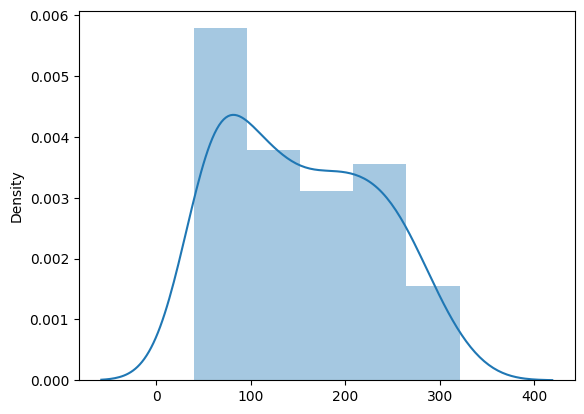

In [27]:
import seaborn as sns
sns.distplot(diabetes_y_test)
pd.DataFrame(data=diabetes_y_test, columns=["values"]).describe()

/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_38295/148769516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_y_pred)


,values
count,80.000000
mean,155.501049
std,57.511599
min,49.193721
25%,112.399159
50%,161.143223
75%,191.047878
max,279.598577


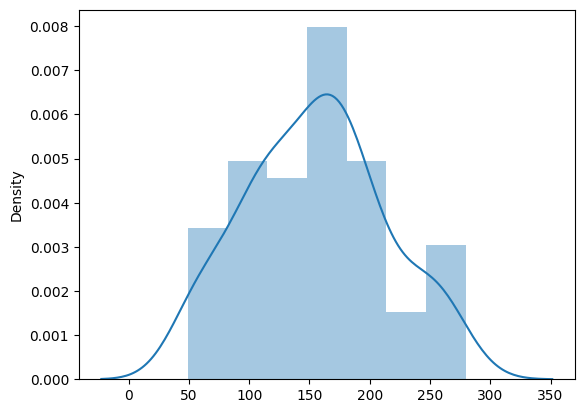

In [30]:
sns.distplot(diabetes_y_pred)
pd.DataFrame(data = diabetes_y_pred, columns = ["values"]).describe()

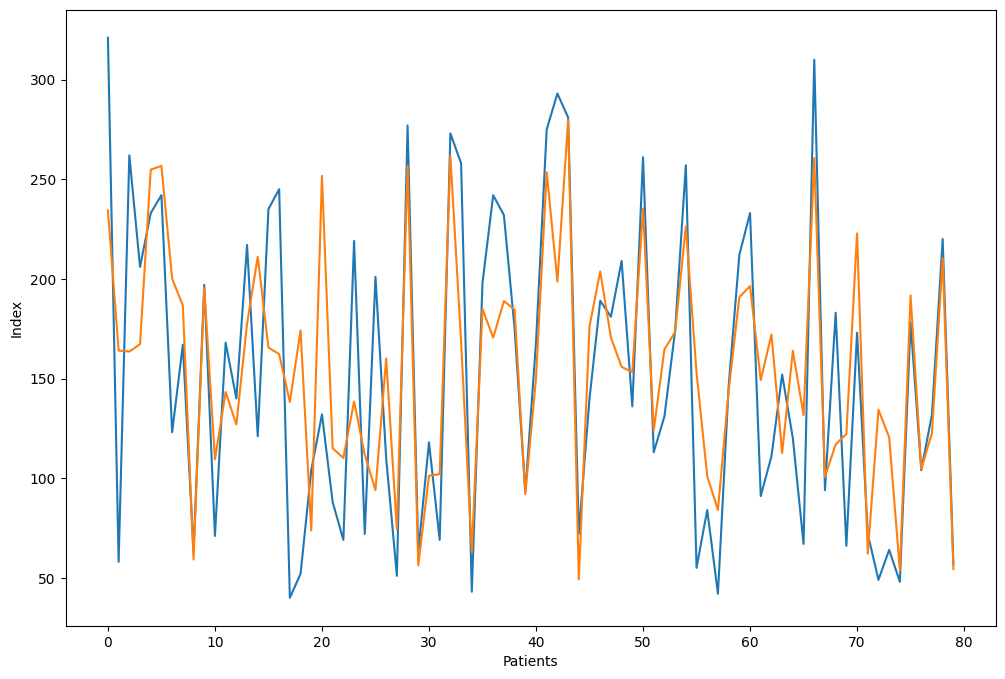

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(diabetes_y_test)
plt.plot(diabetes_y_pred)
plt.xlabel('Patients')
plt.ylabel('Index')
plt.show()